In [1]:
import pandas as pd
import numpy as np
import os
import ast
import argparse
import sys
#from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from processing import *

Data processing completed.


/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/data/processing.py:244: SyntaxWarning: invalid escape sequence '\d'
  '''def extract_timeframes(outcomes):


In [2]:
df = pd.read_csv('cleaned_data_train.csv')
df.dtypes

protocolSection_identificationModule_nctId     object
primary_study_duration_days                   float64
study_duration_days                           float64
primary_eq_bins                                object
study_eq_bins                                  object
study_eq_labels                                 int64
primary_eq_labels                               int64
number_of_conditions                            int64
number_of_groups                                int64
age_group                                       int64
num_locations                                   int64
location                                        int64
num_inclusion                                 float64
num_exclusion                                 float64
number_of_intervention_types                    int64
sponsor_type                                    int64
intervention_model                            float64
resp_party                                      int64
has_dmc                     

In [3]:
df['phase']

0                 ['PHASE1']
1       ['PHASE1', 'PHASE2']
2       ['PHASE1', 'PHASE2']
3       ['PHASE1', 'PHASE2']
4                 ['PHASE1']
                ...         
5034              ['PHASE1']
5035              ['PHASE1']
5036    ['PHASE1', 'PHASE2']
5037    ['PHASE1', 'PHASE2']
5038              ['PHASE1']
Name: phase, Length: 5039, dtype: object

In [17]:
df = pd.read_csv('phase3_oncology_2011_api.csv')

In [18]:
df

,protocolSection_identificationModule_nctId,protocolSection_identificationModule_orgStudyIdInfo_id,protocolSection_identificationModule_organization_fullName,protocolSection_identificationModule_organization_class,protocolSection_identificationModule_briefTitle,protocolSection_identificationModule_officialTitle,protocolSection_statusModule_statusVerifiedDate,protocolSection_statusModule_overallStatus,protocolSection_statusModule_expandedAccessInfo_hasExpandedAccess,protocolSection_statusModule_startDateStruct_date,...,protocolSection_oversightModule_isUsExport,protocolSection_eligibilityModule_genderBased,protocolSection_eligibilityModule_genderDescription,protocolSection_statusModule_expandedAccessInfo_nctId,protocolSection_statusModule_expandedAccessInfo_statusForNctId,protocolSection_referencesModule_availIpds,protocolSection_identificationModule_nctIdAliases,protocolSection_oversightModule_isUnapprovedDevice,protocolSection_identificationModule_orgStudyIdInfo_type,protocolSection_identificationModule_orgStudyIdInfo_link
0,NCT02794324,CCR3593,Royal Marsden NHS Foundation Trust,OTHER,The HeartSpare Study (Stage I),Optimisation and Individualisation of Heart-Sp...,2016-06,COMPLETED,False,2012-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NCT02125344,GBG 84,German Breast Group,OTHER,"A Phase III Trial Comparing Two Dose-dense, Do...",A Randomized Phase III Trial Comparing Two Dos...,2017-07,COMPLETED,False,2014-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NCT03306992,HCI104671,University of Utah,OTHER,Precision-exercise-prescription for Lung Cance...,A Phase III Randomized Study Comparing the Eff...,2023-06,COMPLETED,False,2017-11-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NCT01901692,AMC IRB 2013-0627,Asan Medical Center,OTHER,Sorafenib vs.TransArterial Chemoembolization P...,Randomized Trial Comparing Sorafenib and Trans...,2017-09,COMPLETED,False,2013-07-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NCT01154192,081696,"University of California, San Diego",OTHER,Theca Cell Function in Adolescents With Polycy...,Theca Cell Function in Adolescents With Polycy...,2019-04,COMPLETED,False,2011-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,NCT03825887,CCHE -BM0001,Children's Cancer Hospital Egypt 57357,OTHER,Nalbuphine Versus Morphine for Mucositis Pain ...,Evaluation of Safety and Efficacy of Nalbuphin...,2020-07,COMPLETED,False,2018-02-01,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1630,NCT01962987,71204901,Actavis Inc.,INDUSTRY,A Study Comparing Diclofenac Sodium Gel 3% to ...,"A Randomized, Double-Blind, Multiple-Site, Pla...",2020-07,COMPLETED,False,2013-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1631,NCT01523587,1200.125,Boehringer Ingelheim,INDUSTRY,LUX-Lung 8: A Phase III Trial of Afatinib (BIB...,"LUX-Lung 8: A Randomized, Open-label Phase III...",2019-02,COMPLETED,False,2012-03-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632,NCT02576054,V501-200,Merck Sharp & Dohme LLC,INDUSTRY,Safety and Tolerability Study of V501 in Japan...,"A Phase III, Open-Label, Clinical Trial to Stu...",2019-11,COMPLETED,False,2015-11-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
cols = [i for i in df.columns if 'conditionsModule' in i]
cols

['protocolSection_conditionsModule_conditions',
 'protocolSection_conditionsModule_keywords']

In [20]:
df['protocolSection_conditionsModule_conditions'] = df['protocolSection_conditionsModule_conditions'].apply(ast.literal_eval)

In [21]:
def list_to_lower_string(lst):
    # Ensure the input is a list
    if isinstance(lst, list):
        # Convert each element to a lowercase string and join with spaces
        return ", ".join(map(str, lst)).lower()


In [22]:
df['conditions'] = df['protocolSection_conditionsModule_conditions'].apply(list_to_lower_string)
df['conditions']

0                                           breast cancer
1       tubular breast cancer stage ii, tubular breast...
2       non small cell lung cancer, secondary lung cancer
3                                hepatocellular carcinoma
4                                                    pcos
                              ...                        
1629           acute myeloid leukemia, stem cell leukemia
1630                                    actinic keratosis
1631                       carcinoma, non-small-cell lung
1632    anogenital human papilloma virus infection, co...
1633                       myasthenia gravis, generalized
Name: conditions, Length: 1634, dtype: object

In [23]:
def conditions_map(condition):
  if 'cell lung' in condition:
    return 'squamous cell'
  if 'head and neck' in condition:
    return 'squamous cell'
  if 'squamous cell' in condition:
    return 'squamous cell'
  if 'small cell' in condition:
    return 'squamous cell'
  if 'lung' in condition:
    return 'squamous cell'
  if 'keratosis' in condition:
    return 'squamous cell'
  if 'myeloma' in condition:
    return 'myeloma'
  if 'sarcoma' in condition:
    return 'sarcoma'
  if 'lymphoma' in condition:
    return 'lymphoma'
  if 'brain cancer' in condition:
    return 'brain'
  if 'melanoma' in condition:
    return 'melanoma'
  if 'adenocarcinoma' in condition:
    return 'adeno'
  if 'prostate cancer' in condition:
    return 'adeno'
  if 'breast' in condition:
    return 'ductal'
  if 'leukemia' in condition:
    return 'leukemia'
  if 'colorectal' in condition:
    return 'adeno'
  if 'glioblastoma' in condition:
    return 'brain'
  if 'kidney' in condition:
    return 'adeno'
  if 'renal' in condition:
    return 'adeno'
  if 'hematopoietic' in condition:
    return 'leukemia'
  if 'lymphoid' in condition:
    return 'lymphoma'
  if 'cervix' in condition:
    return 'adeno'
  if 'cervical' in condition:
    return 'adeno'
  if 'liver' in condition:
    return 'adeno'
  if 'hepatic' in condition:
    return 'adeno'
  if 'hepatocellular' in condition:
    return 'adeno'
  if 'nsclc' in condition:
    return 'squamous cell'
  if 'thyroid' in condition:
    return 'adeno'
  if 'pain' in condition:
    return 'pain'
  elif 'carcinoma' in condition:
    return 'carcinoma'
  return 'other'

In [24]:
df['conditions_category'] = df['conditions'].apply(lambda x: conditions_map(x))
df['conditions_category']

0              ductal
1              ductal
2       squamous cell
3               adeno
4               other
            ...      
1629         leukemia
1630    squamous cell
1631    squamous cell
1632            other
1633            other
Name: conditions_category, Length: 1634, dtype: object

In [25]:
category_map = {'myeloma': 0, 'squamous cell': 1, 'adeno': 2, 'carcinoma': 3, 'leukemia': 4, 'ductal': 5, 'sarcoma': 6, 'lymphoma': 7, 'melanoma': 8,
                'brain': 9, 'pain': 10, 'other': 11}

# Create new column for category as int
df['conditions_category_num'] = df['conditions_category'].map(category_map)

In [26]:
# 5 year survival dict
conditions_5yr_survival_map = {'myeloma': 0.598, 'squamous cell': 0.99, 'adeno': 0.175, 'carcinoma': 0.99, 'leukemia': 0.65, 'ductal': 0.99, 'sarcoma': 0.65,
                                    'lymphoma': 0.83, 'melanoma': 0.94, 'brain': 0.326, 'pain': 0.68, 'other': 0.68}

df['survival_5yr_relative'] = df['conditions_category'].map(conditions_5yr_survival_map)

In [27]:
# Min and max treatment duration dicts
conditions_max_treatment_duration_map = {'myeloma': 180, 'squamous cell': 49, 'adeno': 1080, 'carcinoma': 1440, 'leukemia': 1095, 'ductal': 1825, 'sarcoma': 1825,
                                         'lymphoma': 730, 'melanoma': 730, 'brain': 4320, 'pain': 4320, 'other': 4320}
conditions_min_treatment_duration_map = {'myeloma': 90, 'squamous cell': 14, 'adeno': 360, 'carcinoma': 360, 'leukemia': 730, 'ductal': 365, 'sarcoma': 240,
                                         'lymphoma': 180, 'melanoma': 150, 'brain': 1080, 'pain': 14, 'other': 14}

# Create treatment duration columns
df['max_treatment_duration'] = df['conditions_category'].map(conditions_max_treatment_duration_map)
df['min_treatment_duration'] = df['conditions_category'].map(conditions_min_treatment_duration_map)

In [28]:
cols = [
    'max_treatment_duration',
    'min_treatment_duration',
    'survival_5yr_relative',
    'conditions_category_num',
    'conditions_category'
]

df[cols]

,max_treatment_duration,min_treatment_duration,survival_5yr_relative,conditions_category_num,conditions_category
0,1825,365,0.990,5,ductal
1,1825,365,0.990,5,ductal
2,49,14,0.990,1,squamous cell
3,1080,360,0.175,2,adeno
4,4320,14,0.680,11,other
...,...,...,...,...,...
1629,1095,730,0.650,4,leukemia
1630,49,14,0.990,1,squamous cell
1631,49,14,0.990,1,squamous cell
1632,4320,14,0.680,11,other


In [29]:
df['start_date'] = df['protocolSection_statusModule_startDateStruct_date'].apply(convert_to_datetime)
df['primary_completion_date'] = df['protocolSection_statusModule_primaryCompletionDateStruct_date'].apply(convert_to_datetime)
df['completion_date'] = df['protocolSection_statusModule_completionDateStruct_date'].apply(convert_to_datetime)
df['primary_study_duration_days'] = (df['primary_completion_date'] - df['start_date']).dt.days
df['study_duration_days'] = (df['completion_date'] - df['start_date']).dt.days

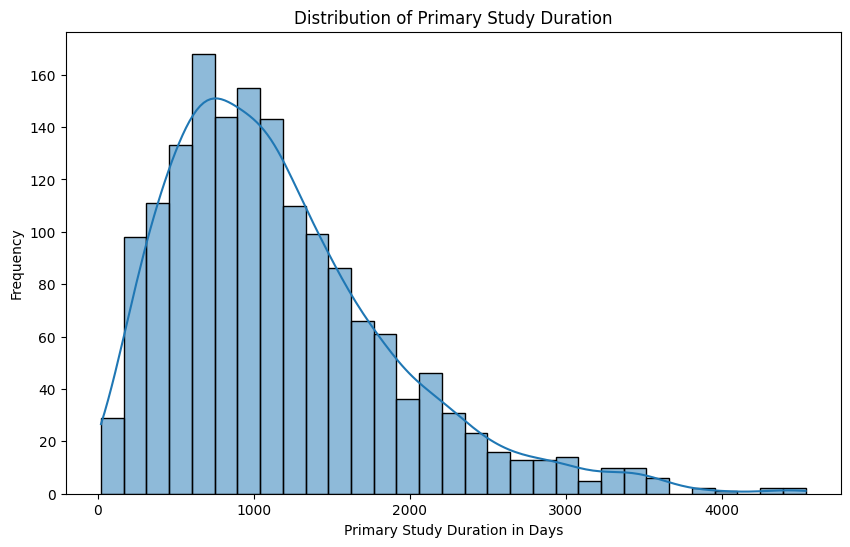

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['primary_study_duration_days'].dropna(), kde=True)
plt.title('Distribution of Primary Study Duration')
plt.xlabel('Primary Study Duration in Days')
plt.ylabel('Frequency')
plt.show()

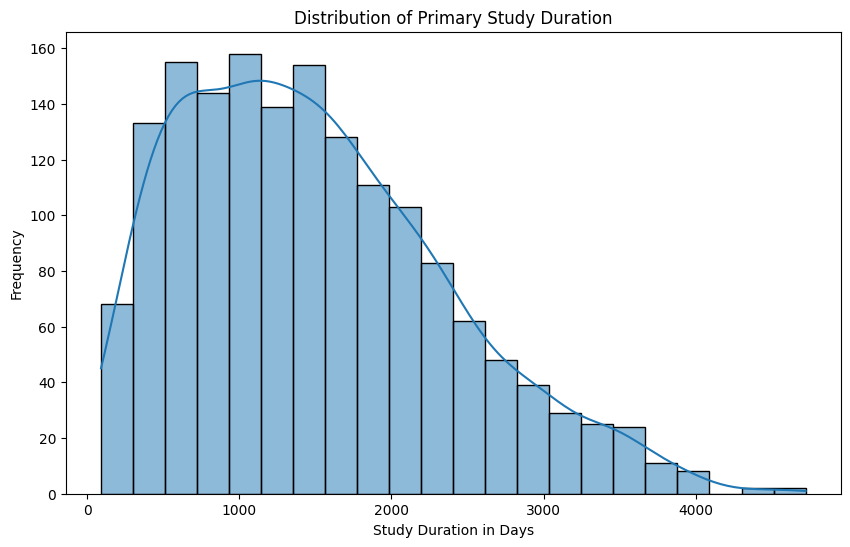

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['study_duration_days'].dropna(), kde=True)
plt.title('Distribution of Primary Study Duration')
plt.xlabel('Study Duration in Days')
plt.ylabel('Frequency')
plt.show()

In [32]:
# drop rows with NaNs in study_duration_days or primary_study_duration_days
df = df.dropna(subset=['study_duration_days', 'primary_study_duration_days']).copy()

n_intervals = 5

In [33]:
df['study_eq_bins'] = pd.qcut(df['study_duration_days'], q=n_intervals)
df['primary_eq_bins'] = pd.qcut(df['primary_study_duration_days'], q=n_intervals)


In [34]:
df['study_eq_labels'] = df['study_eq_bins'].cat.codes
df['primary_eq_labels'] = df['primary_eq_bins'].cat.codes

In [35]:
df['study_eq_labels'].value_counts()

study_eq_labels
1    326
0    326
3    325
4    325
2    324
Name: count, dtype: int64

In [36]:
# X = df[['study_duration_days']]

# # Specify a range of clusters
# clusters_range = range(1, 11)
# inertia = []

# # Calculate inertia (within-cluster sum of squares) for each k
# for k in clusters_range:
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(X)
#     inertia.append(kmeans.inertia_)

# # Plotting the Elbow curve
# plt.plot(clusters_range, inertia, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Optimal k')
# plt.show()

In [37]:
# # drop rows with NaNs in study_duration_days or primary_study_duration_days
# df = df.dropna(subset=['study_duration_days', 'primary_study_duration_days']).copy()

# n_intervals = 3

# kmeans_study = KMeans(n_clusters=n_intervals, random_state=42)
# df['study_cluster'] = kmeans_study.fit_predict(df[['study_duration_days']])
# # centroids = kmeans_study.cluster_centers_.flatten()
# # sorted_centroids = np.sort(centroids)
# # bin_edges = np.concatenate(([df['study_duration_days'].min()], sorted_centroids, [df['study_duration_days'].max()]))
# # bin_edges = np.concatenate(([df['study_duration_days'].min()], sorted_centroids, [df['study_duration_days'].max()]))


# # Ensure bin edges do not create extra bins by adding small epsilon to max
# # epsilon = 1e-10
# # bin_edges[-1] += epsilon

# # # Fit K-Means for primary_study_duration_days
# # kmeans_primary_study = KMeans(n_clusters=n_intervals, random_state=42)
# # df['primary_study_cluster'] = kmeans_primary_study.fit_predict(df[['primary_study_duration_days']])

# # Assign intervals based on cluster centroids for each column
# df['study_duration_bins'] = pd.cut(df['study_duration_days'], bins=np.sort(kmeans_study.cluster_centers_.flatten()))

# # df['study_duration_bins'] = pd.cut(df['study_duration_days'], bins=bin_edges, include_lowest=True)
# # df['primary_study_duration_bins'] = pd.cut(df['primary_study_duration_days'], bins=np.sort(kmeans_primary_study.cluster_centers_.flatten()))
# df

In [38]:
df['study_eq_bins'].value_counts(dropna=False)

study_eq_bins
(90.999, 673.0]     326
(673.0, 1131.0]     326
(1603.0, 2210.0]    325
(2210.0, 4722.0]    325
(1131.0, 1603.0]    324
Name: count, dtype: int64

In [42]:
current = os.getcwd()
parent_dir = os.path.dirname(current)  # Get parent directory

parent_dir


'/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials'

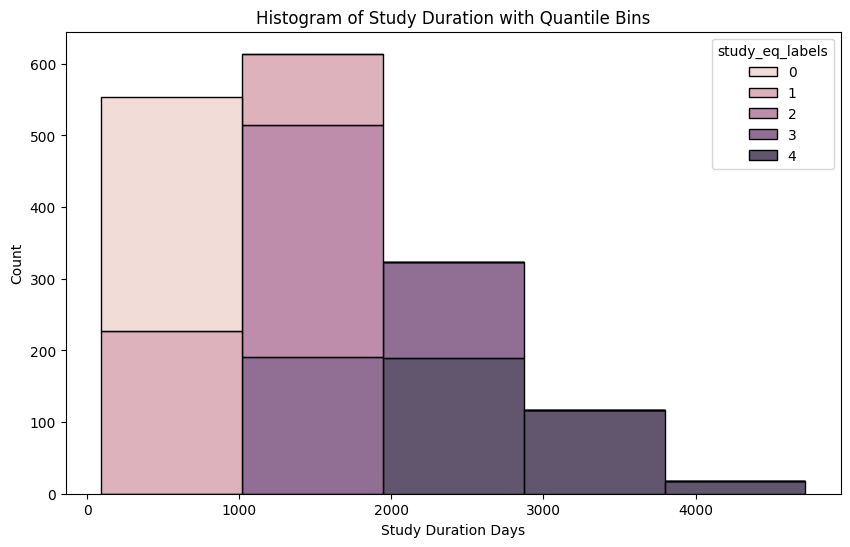

In [43]:
# Plot the histogram of the original data with the bin annotations
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='study_duration_days', bins=n_intervals, kde=False, hue='study_eq_labels', multiple='stack')
plt.xlabel('Study Duration Days')
plt.ylabel('Count')
plt.title('Histogram of Study Duration with Quantile Bins')
plt.savefig(os.path.join(parent_dir, 'figures', 'binned_study_duration.png'))
plt.show()

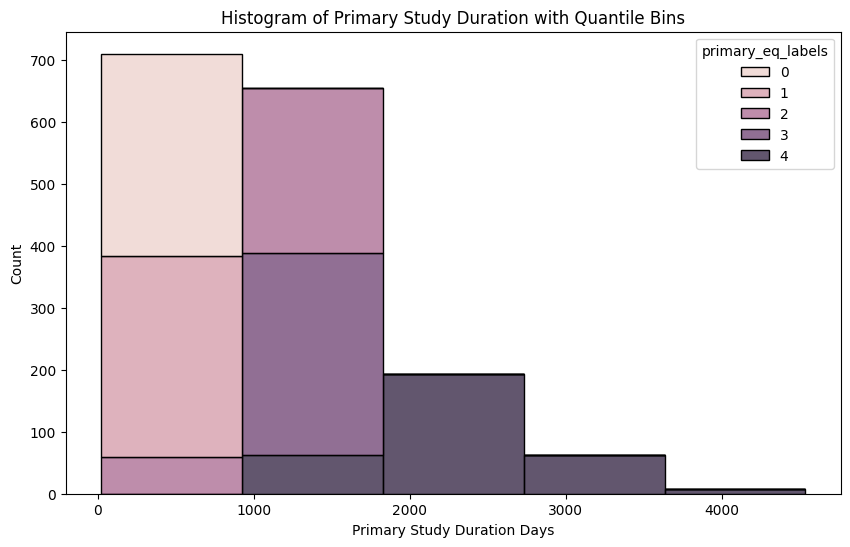

In [44]:
# Plot the histogram of the original data with the bin annotations
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='primary_study_duration_days', bins=n_intervals, kde=False, hue='primary_eq_labels', multiple='stack')
plt.xlabel('Primary Study Duration Days')
plt.ylabel('Count')
plt.title('Histogram of Primary Study Duration with Quantile Bins')
plt.savefig(os.path.join(parent_dir, 'figures', 'binned_primary_study_duration.png'))
plt.show()

In [16]:
bins_dict = df.groupby('study_eq_labels')['study_eq_bins'].apply(lambda x: x.unique()[0]).to_dict()
bins_dict


{0: Interval(90.999, 673.0, closed='right'),
 1: Interval(673.0, 1131.0, closed='right'),
 2: Interval(1131.0, 1603.0, closed='right'),
 3: Interval(1603.0, 2210.0, closed='right'),
 4: Interval(2210.0, 4722.0, closed='right')}

In [17]:
# def sample_rows(df, group_col, n=1):
#     sampled_df = df.groupby(group_col).apply(lambda x: x.sample(n=n, random_state=42)).reset_index(drop=True)
#     return sampled_df


# protocols = pd.DataFrame()
# for i in range(n_intervals):
#     sampled_row = sample_rows(df, 'study_eq_labels', n=1)
#     protocols = pd.concat([sampled_row], ignore_index=True)

# protocols

In [18]:
# cols = [
#     'protocolSection_identificationModule_nctId',
#     'primary_study_duration_days',
#     'study_duration_days',
#     # 'study_eq_bins',
#     # 'primary_eq_bins',
#     'study_eq_labels',
#     # 'primary_eq_labels'
# ]
# protocols = protocols[cols]
# protocols

In [19]:
# protocols['url'] = 'https://clinicaltrials.gov/study/'+df['protocolSection_identificationModule_nctId']
# protocols['study_duration_months'] = protocols['study_duration_days']/30
# protocols['study_duration_years'] = protocols['study_duration_months']/12

# protocols

In [20]:
# protocols.to_csv("sme_protocols.csv", index=False)

In [22]:
# # Get cluster labels and centroids
# labels = list(df['study_eq_bins'].unique())
# # centroids = kmeans_study.cluster_centers_

# # Plot data points and color them by their cluster label
# plt.scatter(df['study_duration_days'], df['primary_study_duration_days'], c=labels, cmap='viridis', marker='o', edgecolor='k', s=100)


# # Adding labels and title
# plt.xlabel('Feature 1')
# # plt.ylabel('Feature 2')
# plt.title('K-Means Clustering')
# plt.legend()
# plt.show()

In [23]:
x = [i for i in df.columns if 'eligibility' in i]
x

['protocolSection_eligibilityModule_eligibilityCriteria',
 'protocolSection_eligibilityModule_healthyVolunteers',
 'protocolSection_eligibilityModule_sex',
 'protocolSection_eligibilityModule_minimumAge',
 'protocolSection_eligibilityModule_stdAges',
 'protocolSection_eligibilityModule_maximumAge',
 'protocolSection_eligibilityModule_genderBased',
 'protocolSection_eligibilityModule_genderDescription']

In [63]:
criteria = df['protocolSection_eligibilityModule_eligibilityCriteria'][871]

print(criteria)

Inclusion Criteria:

* Existing Leukoplakia simplex SIN III (diagnostics by Biopsie)
* Leukoplakia verrucosa without indications of malignant changes (diagnostics by Biopsie)
* Oral Lichen planus SIN III (diagnostics by Biopsie)
* Good mouth hygiene status (tartar, surface)
* Correct seat of the prosthesis and/or the denture
* Located erosions in the oral cavity
* Minimum age:18 years
* Women at the age capable of child-bearing with an appropriate contraception

Exclusion Criteria:

* Malignant changes of the mucous membrane, heavy Dysplasie SIN III, Carcinoma in situ - heavy vitamin deficiency
* Pregnancy
* less than 18
* Satisfying women
* No tobacco abuse
* satisfying therapy with local immunmodulators in lichen ruber
* surgical therapy of leukoplakia indicated


In [64]:
criteria

'Inclusion Criteria:\n\n* Existing Leukoplakia simplex SIN III (diagnostics by Biopsie)\n* Leukoplakia verrucosa without indications of malignant changes (diagnostics by Biopsie)\n* Oral Lichen planus SIN III (diagnostics by Biopsie)\n* Good mouth hygiene status (tartar, surface)\n* Correct seat of the prosthesis and/or the denture\n* Located erosions in the oral cavity\n* Minimum age:18 years\n* Women at the age capable of child-bearing with an appropriate contraception\n\nExclusion Criteria:\n\n* Malignant changes of the mucous membrane, heavy Dysplasie SIN III, Carcinoma in situ - heavy vitamin deficiency\n* Pregnancy\n* less than 18\n* Satisfying women\n* No tobacco abuse\n* satisfying therapy with local immunmodulators in lichen ruber\n* surgical therapy of leukoplakia indicated'

In [65]:
if 'Inclusion Criteria' not in criteria:
    raise ValueError("The 'Inclusion Criteria' section is missing.")

# Validate that the exclusion_criteria part originally contained 'Exclusion Criteria'
if 'Exclusion Criteria' not in criteria:
    raise ValueError("The 'Exclusion Criteria' section is missing.")

In [66]:
# Split the string into inclusion and exclusion criteria sections
parts = criteria.split("\n\nExclusion Criteria:\n")

# Add "Exclusion Criteria:" back to the second part and strip any leading/trailing whitespace
inclusion_criteria = parts[0].replace('Inclusion Criteria:\n', '', 1)
exclusion_criteria = parts[1]

inclusion_criteria


'\n* Existing Leukoplakia simplex SIN III (diagnostics by Biopsie)\n* Leukoplakia verrucosa without indications of malignant changes (diagnostics by Biopsie)\n* Oral Lichen planus SIN III (diagnostics by Biopsie)\n* Good mouth hygiene status (tartar, surface)\n* Correct seat of the prosthesis and/or the denture\n* Located erosions in the oral cavity\n* Minimum age:18 years\n* Women at the age capable of child-bearing with an appropriate contraception'

In [72]:
len(df)

1626

In [133]:
def count_break(value):
    if "inclusion criteria" in value.lower():
        return True
    else:
        return False

In [134]:
df["temp_bool"] = df['protocolSection_eligibilityModule_eligibilityCriteria'].apply(count_break)

df["temp_bool"].value_counts(dropna=False)

temp_bool
True     1602
False      24
Name: count, dtype: int64

In [135]:
temp_df = df.loc[df['temp_bool']==False, 'protocolSection_eligibilityModule_eligibilityCriteria']
temp_df

144     Preregistration Eligibility:\n\n1. Histologic ...
179     Subjects will only be included with a histolog...
259     1. Participants must have confirmed diagnosis ...
285     1. Patients with bladder cancer in follow-up f...
476     Study Patient Participant Eligibility Requirem...
544     Inclusion:\n\n* Adult subjects with previously...
600     Requirements for participants:\n\nPatients onl...
742     Enrollment Criteria:\n\n* Female patients with...
766     Histologically confirmed de novo glioblastoma ...
794     * Diagnosis of malignant disease\n* No prior c...
795     DISEASE CHARACTERISTICS:\n\n* Diagnosis of hig...
822     1. Male or female, age 18 to 75 years, inclusi...
878     Eligibility Criteria\n\n1. Women aged 18 to 70...
993     Inclusion:\n\nSubjects must meet all of the fo...
1065    1. Provide signed and dated written informed c...
1222    For inclusion in the study, patients should fu...
1229    Inclusion:\n\n* Participants should have patho...
1248    DISEAS

In [177]:
criteria = df['protocolSection_eligibilityModule_eligibilityCriteria'][1222]
print(criteria)

For inclusion in the study, patients should fulfill the following criteria:

1. Male or female ≥18 years at the time of Screening.
2. Written informed consent obtained from the patient/legal representative prior to performing any protocol-related procedures, including screening evaluations.
3. Histologically or cytologically documented extensive stage SCLC (stage IV \[T any, N any, M1 a/b\], or with T3-4 due to multiple lung nodules that are too extensive or have tumor/nodal volume that is too large to be encompassed in a tolerable radiation plan, according to American Joint Committee on Cancer Stage 8th edition).

   - Brain metastases; must be asymptomatic or treated and stable off steroids and anti-convulsants for at least 1 month prior to study treatment. Patients with suspected brain metastases at screening should have a CT/MRI of the brain prior to study entry.
4. Patients must be considered suitable to receive a platinum-based chemotherapy regimen as 1st line treatment for the E

In [173]:
# Split the string into inclusion and exclusion criteria sections
parts = criteria.lower().split("exclusion criteria")

# Add "Exclusion Criteria:" back to the second part and strip any leading/trailing whitespace
inclusion_criteria = parts[0]
exclusion_criteria = parts[1]

inclusion_criteria

IndexError: list index out of range

In [180]:
print(criteria)

For inclusion in the study, patients should fulfill the following criteria:

1. Male or female ≥18 years at the time of Screening.
2. Written informed consent obtained from the patient/legal representative prior to performing any protocol-related procedures, including screening evaluations.
3. Histologically or cytologically documented extensive stage SCLC (stage IV \[T any, N any, M1 a/b\], or with T3-4 due to multiple lung nodules that are too extensive or have tumor/nodal volume that is too large to be encompassed in a tolerable radiation plan, according to American Joint Committee on Cancer Stage 8th edition).

   - Brain metastases; must be asymptomatic or treated and stable off steroids and anti-convulsants for at least 1 month prior to study treatment. Patients with suspected brain metastases at screening should have a CT/MRI of the brain prior to study entry.
4. Patients must be considered suitable to receive a platinum-based chemotherapy regimen as 1st line treatment for the E

In [181]:
import re

pattern =  r'\n\s*\w{1,2}\.|[*]|\-'
matches = re.findall(pattern, criteria)

matches

['\n\n1.',
 '\n2.',
 '-',
 '\n3.',
 '-',
 '-',
 '-',
 '\n4.',
 '-',
 '-',
 '\n5.',
 '\n6.',
 '-',
 '-',
 '\n7.',
 '\n8.',
 '\n9.',
 '\n10.',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '\n11.',
 '*',
 '*',
 '-',
 '*',
 '*',
 '*',
 '*',
 '*',
 '\n12.',
 '-',
 '-',
 '-',
 '-',
 '*',
 '-',
 '-',
 '*',
 '-',
 '-',
 '-',
 '\n\n1.',
 '\n2.',
 '-',
 '-',
 '\n3.',
 '-',
 '-',
 '\n4.',
 '-',
 '-',
 '-',
 '-',
 '\n5.',
 '\n6.',
 '\n7.',
 '\n8.',
 '\n9.',
 '\n10.',
 '*',
 '*',
 '*',
 '*',
 '*',
 '\n11.',
 '\n12.',
 '\n13.',
 '-',
 '\n14.',
 '*',
 '*',
 '*',
 '*',
 '\n15.',
 '\n16.']

In [182]:
def count_criteria(criteria):
    # pattern
    # line break, \n, followed by any amount of whitespace
    # followed by an alphanumeric character 1-2 characters in length followed by a period
    # OR an asterisk
    # OR a hyphen
    pattern =  r'\n\s*\w{1,2}\.|[*]|\-'
    # some studies do not explicitly state exclusion criteria and list inclusion criteria only
    if "exclusion criteria" in criteria.lower():
        parts = criteria.lower().split("exclusion criteria")
        inclusion_criteria = parts[0]
        exclusion_criteria = parts[1]

        inclusion_matches = re.findall(pattern, inclusion_criteria)
        exclusion_matches = re.findall(pattern, exclusion_criteria)
        num_inclusion = len(inclusion_matches)
        num_exclusion = len(exclusion_matches)
    else:
        inclusion_matches = re.findall(pattern, criteria)
        num_inclusion = len(inclusion_matches)
        num_exclusion = np.nan
    
    return num_inclusion, num_exclusion

In [183]:
df[['num_inclusion', 'num_exclusion']]= df['protocolSection_eligibilityModule_eligibilityCriteria'].apply(count_criteria).apply(pd.Series)

In [152]:
df.loc[df['num_exclusion'] == 0, 'protocolSection_eligibilityModule_eligibilityCriteria']

0       Inclusion Criteria:\n\n* Complete microscopic ...
1       Inclusion Criteria:\n\nPatients will be eligib...
2       Inclusion Criteria:\n\n* Male or female subjec...
3       Inclusion Criteria:\n\n* Age \>19 years\n* Chi...
4       Inclusion Criteria:\n\n* Normal CBC (Hemoglobi...
                              ...                        
1623    Inclusion criteria:\n\n* Diagnosis of Primary ...
1626    Inclusion Criteria:\n\n* Histologically confir...
1627    Inclusion Criteria:\n\n* Subject is a premenop...
1629    Inclusion Criteria:\n\n* Newly diagnosed Prima...
1632    Inclusion Criteria:\n\n* Healthy Japanese male...
Name: protocolSection_eligibilityModule_eligibilityCriteria, Length: 1125, dtype: object

In [186]:
df['num_exclusion'].value_counts(dropna=False)

num_exclusion
6.0     100
7.0      89
5.0      85
9.0      83
4.0      81
8.0      80
10.0     71
3.0      68
14.0     62
11.0     62
12.0     60
15.0     54
13.0     51
1.0      47
18.0     46
2.0      46
16.0     38
22.0     36
NaN      34
17.0     33
19.0     29
23.0     29
20.0     28
26.0     27
21.0     26
27.0     25
0.0      24
25.0     22
30.0     19
24.0     19
29.0     17
31.0     16
34.0     12
33.0     11
35.0     10
28.0     10
32.0     10
39.0      8
36.0      8
45.0      5
48.0      5
40.0      5
37.0      4
41.0      4
43.0      3
44.0      3
52.0      3
42.0      3
49.0      2
38.0      2
58.0      2
51.0      2
46.0      1
63.0      1
55.0      1
54.0      1
50.0      1
60.0      1
47.0      1
Name: count, dtype: int64

In [ ]:
def count_criteria(value):
    parts = value.split("Exclusion Criteria:")
    inclusion_criteria = parts[0].strip()

In [13]:
spon_map = {
    'OTHER_GOV': 'OTHER',
    'NETWORK': 'OTHER',
    'NIH': 'OTHER',
    'FED': 'OTHER',
    'INDIV': 'OTHER'
}

spon_map2 = {
    "INDUSTRY": 1,
    "OTHER": 0
}

df['sponsor_type0'] = df['protocolSection_sponsorCollaboratorsModule_leadSponsor_class'].replace(spon_map)
df['sponsor_type'] = df['sponsor_type0'].map(spon_map2)

In [14]:
df['protocolSection_conditionsModule_conditions'] = df['protocolSection_conditionsModule_conditions'].apply(ast.literal_eval)
df['number_of_conditions'] = df['protocolSection_conditionsModule_conditions'].apply(lambda x: len(x))

In [15]:
assign_map = {
    "CROSSOVER": "OTHER",
    "SEQUENTIAL": "OTHER",
    "FACTORIAL": "OTHER"
}

assign_map2 = {
    "SINGLE_GROUP": 0,
    "PARALLEL": 1,
    "OTHER": 2
}

df['intervention_model0'] = df['protocolSection_designModule_designInfo_interventionModel'].replace(assign_map)
df['intervention_model'] = df['intervention_model0'].map(assign_map2)

In [16]:
df['intervention_model'].value_counts(dropna=False)

intervention_model
1.0    1307
0.0     251
2.0      64
NaN       4
Name: count, dtype: int64

In [17]:
# Extract purposes into new columns
df['protocolSection_designModule_designInfo_primaryPurpose'] = df['protocolSection_designModule_designInfo_primaryPurpose'].fillna('')
df['treatment_purpose'] = df['protocolSection_designModule_designInfo_primaryPurpose'].apply(lambda x: 1 if 'TREATMENT' in x else 0)
df['diagnostic_purpose'] = df['protocolSection_designModule_designInfo_primaryPurpose'].apply(lambda x: 1 if 'DIAGNOSTIC' in x else 0)
df['prevention_purpose'] = df['protocolSection_designModule_designInfo_primaryPurpose'].apply(lambda x: 1 if 'PREVENTION' in x else 0)
df['supportive_purpose'] = df['protocolSection_designModule_designInfo_primaryPurpose'].apply(lambda x: 1 if 'SUPPORTIVE_CARE' in x else 0)


In [18]:
# Extract interventions into new columns
df['procedure_intervention'] = df['protocolSection_armsInterventionsModule_interventions'].apply(lambda x: 1 if 'PROCEDURE' in x else 0)
df['device_intervention'] = df['protocolSection_armsInterventionsModule_interventions'].apply(lambda x: 1 if 'DEVICE' in x else 0)
df['behavioral_intervention'] = df['protocolSection_armsInterventionsModule_interventions'].apply(lambda x: 1 if 'BEHAVIORAL' in x else 0)
df['drug_intervention'] = df['protocolSection_armsInterventionsModule_interventions'].apply(lambda x: 1 if 'DRUG' in x else 0)
df['radiation_intervention'] = df['protocolSection_armsInterventionsModule_interventions'].apply(lambda x: 1 if 'RADIATION' in x else 0)
df['biological_intervention'] = df['protocolSection_armsInterventionsModule_interventions'].apply(lambda x: 1 if 'BIOLOGICAL' in x else 0)


In [19]:
df['protocolSection_armsInterventionsModule_armGroups'] = df['protocolSection_armsInterventionsModule_armGroups'].apply(pr.safe_eval)
df['number_of_groups'] = df['protocolSection_armsInterventionsModule_armGroups'].apply(lambda x: len(x) if isinstance(x, list) else 0)


In [20]:
df['protocolSection_armsInterventionsModule_interventions'] = df['protocolSection_armsInterventionsModule_interventions'].apply(eval)
df['intervention_types'] = df['protocolSection_armsInterventionsModule_interventions'].apply(pr.extract_type)
df['number_of_intervention_types'] = df['intervention_types'].apply(len)


In [21]:
age_map = {
    "['ADULT', 'OLDER_ADULT']": "adult",
    "['ADULT']": "adult",
    "['OLDER_ADULT']": "adult",
    "['CHILD']": "youth",
    "['CHILD', 'ADULT']": "youth",
    "['CHILD', 'ADULT', 'OLDER_ADULT']": "all"
}

age_map2 = {
    "youth": 0,
    "adult": 1,
    "all": 2
}
df["age_group0"] = df["protocolSection_eligibilityModule_stdAges"].map(age_map)
df["age_group"] = df["age_group0"].map(age_map2)

In [12]:
df["num_locations"] = df["protocolSection_contactsLocationsModule_locations"].apply(pr.count_loc)


In [36]:
value = df["protocolSection_contactsLocationsModule_locations"][434]
new_string = value.split(", ")
temp_list = []
for i in new_string:
    if "country" in i:
        temp_list.append(i)

temp_list

["'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'Argentina'",
 "'country': 'Argentina'",
 "'country': 'Argentina'",
 "'country': 'Argentina'",
 "'country': 'Argentina'",
 "'country': 'Argentina'",
 "'country': 'Australia'",
 "'country': 'Australia'",
 "'country': 'Australia'",
 "'country': 'Australia'",
 "'country': 'Australia'",
 "'country': 'Austria'",
 "'country': 'Austria'",
 "'country': 'Austria'",
 "'country': 'Belgium'",
 "'country': 'Belgium'",
 "'country': 'Belgium'",
 "'country': 'Belgium'",
 "'country': 'Belgium'",
 "'country': 'Brazil'",
 "'country': '

In [37]:
has_us = [i for i in temp_list if "United States" in i]
has_us

["'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'",
 "'country': 'United States'"]

In [38]:
if all(i == temp_list[0] for i in temp_list) and has_us:
    print("USA")
elif not has_us:
    print("non-USA")
else:
    print("USA & non-USA")

USA & non-USA


In [34]:
if not has_us:
    print('poo')

poo


In [40]:
def trial_loc(value):
  if pd.isna(value):
    return np.nan
  else:
    new_string = value.split(", ")
    temp_list = []
    for i in new_string:
      if "country" in i:
        temp_list.append(i)
    has_us = [i for i in temp_list if "United States" in i]

    if all(i == temp_list[0] for i in temp_list) and has_us:
        loc = 'USA'
    elif not has_us:
        loc = "non-USA"
    else:
        loc = "USA & non-USA"
    return loc

In [42]:
df['location'] = df["protocolSection_contactsLocationsModule_locations"].apply(trial_loc)
df['location'].value_counts(dropna=False)

location
non-USA          896
USA & non-USA    447
USA              207
NaN               76
Name: count, dtype: int64

In [16]:
# Combine outcome measures
# May need to separate this and re-do outcome measures features depending on our y variable
df['outcome_measures'] = df['protocolSection_outcomesModule_primaryOutcomes'] + df['protocolSection_outcomesModule_secondaryOutcomes']
df['outcome_measures'] = df['outcome_measures'].astype('str')
df['outcome_measures'] = df['outcome_measures'].str.lower()

df['os_outcome_measure'] = df['outcome_measures'].apply(lambda x: 1 if ' OS ' in x else 0) # sometimes abbreviated as OS
df['os_outcome_measure2'] = df['outcome_measures'].apply(lambda x: 1 if 'overall survival' in x else 0) # sometimes fully spelled out

# Make sure there's no overlap
df['os_outcome_measure'] = df['os_outcome_measure'] + df['os_outcome_measure2']
df = df.drop(columns=['os_outcome_measure2'])
df['os_outcome_measure'] = df['os_outcome_measure'].apply(lambda x: x if x==0 else 1)

In [17]:
df['ae_outcome_measure'] = df['outcome_measures'].apply(lambda x: 1 if 'adverse event' in x else 0)

In [18]:
# Duration of Response OM
df['dor_outcome_measure'] = df['outcome_measures'].apply(lambda x: 1 if ' DOR ' in x else 0) # sometimes abbreviated as DOR
df['dor_outcome_measure2'] = df['outcome_measures'].apply(lambda x: 1 if 'duration of response' in x else 0) # sometimes fully spelled out

# Make sure there's no overlap
df['dor_outcome_measure'] = df['dor_outcome_measure'] + df['dor_outcome_measure2']
df = df.drop(columns=['dor_outcome_measure2'])
df['dor_outcome_measure'] = df['dor_outcome_measure'].apply(lambda x: x if x==0 else 1)

In [19]:
df['protocolSection_outcomesModule_primaryOutcomes'] = df['protocolSection_outcomesModule_primaryOutcomes'].apply(pr.safe_eval)
df['protocolSection_outcomesModule_secondaryOutcomes'] = df['protocolSection_outcomesModule_secondaryOutcomes'].apply(pr.safe_eval)

# Applying the function to create the new column
df['primary_measure'] = df['protocolSection_outcomesModule_primaryOutcomes'].apply(pr.extract_measures)
df['secondary_measure'] = df['protocolSection_outcomesModule_secondaryOutcomes'].apply(pr.extract_measures)

# Applying the function to create the new column
df['primary_timeFrame'] = df['protocolSection_outcomesModule_primaryOutcomes'].apply(pr.extract_timeframes)
df['secondary_timeFrame'] = df['protocolSection_outcomesModule_secondaryOutcomes'].apply(pr.extract_timeframes)

In [20]:
df['primary_duration'] = df['primary_timeFrame'].apply(pr.extract_time_length_from_list)
df['secondary_duration'] = df['secondary_timeFrame'].apply(pr.extract_time_length_from_list)

In [21]:
# Applying the function to the dataframe
df['primary_max_days'] = df['primary_duration'].apply(pr.find_max_duration)
df['secondary_max_days'] = df['secondary_duration'].apply(pr.find_max_duration)

In [22]:
df['protocolSection_oversightModule_oversightHasDmc'] = df['protocolSection_oversightModule_oversightHasDmc'].astype('str')
df['protocolSection_oversightModule_oversightHasDmc'] = df['protocolSection_oversightModule_oversightHasDmc'].str.lower()
dmc_map = {
    'true': 1,
    'false': 0,
}
df['has_dmc'] = df['protocolSection_oversightModule_oversightHasDmc'].map(dmc_map)

In [23]:
party_map = {
    "PRINCIPAL_INVESTIGATOR": 0,
    "SPONSOR": 1,
    "SPONSOR_INVESTIGATOR": 2
}

df['resp_party'] = df['protocolSection_sponsorCollaboratorsModule_responsibleParty_type'].map(party_map)

In [24]:
allo_map = {
    'NON_RANDOMIZED': 0,
    'RANDOMIZED': 1
}

df['allocation'] = df['protocolSection_designModule_designInfo_allocation'].map(allo_map)

In [25]:
mask_map = {
    "NONE": 0,
    "SINGLE": 1,
    "DOUBLE": 2,
    "TRIPLE": 3,
    "QUADRUPLE": 4
}

df['masking'] = df['protocolSection_designModule_designInfo_maskingInfo_masking'].map(mask_map)

In [26]:
#make a dataframe with just the columns of interest
cols = [
    'primary_study_duration_days',
    'study_duration_days',
    'number_of_conditions',
    'number_of_groups',
    'age_group',
    'num_locations',
    # 'intervention_types',
    'number_of_intervention_types',
    'sponsor_type',
    'intervention_model',
    'resp_party',
    # 'protocolSection_sponsorCollaboratorsModule_responsibleParty_type',
    'has_dmc',
    # 'protocolSection_oversightModule_oversightHasDmc',
    'protocolSection_designModule_phases',
    'allocation',
    # 'protocolSection_designModule_designInfo_allocation',
    # 'protocolSection_designModule_designInfo_primaryPurpose',
    # 'protocolSection_designModule_designInfo_maskingInfo_masking',
    'masking',
    'protocolSection_designModule_enrollmentInfo_count',
    'protocolSection_eligibilityModule_healthyVolunteers',
    'treatment_purpose',
    'diagnostic_purpose',
    'prevention_purpose',
    'supportive_purpose',
    'procedure_intervention',
    'device_intervention',
    'behavioral_intervention',
    'drug_intervention',
    'radiation_intervention',
    'biological_intervention',
    'os_outcome_measure',
    'dor_outcome_measure',
    'ae_outcome_measure',
    'primary_max_days',
    'secondary_max_days'
    # 'protocolSection_outcomesModule_primaryOutcomes',
    # 'protocolSection_outcomesModule_secondaryOutcomes',
    # 'protocolSection_eligibilityModule_eligibilityCriteria'
]

clean_df = df[cols].copy()
clean_df

,primary_study_duration_days,study_duration_days,number_of_conditions,number_of_groups,age_group,num_locations,number_of_intervention_types,sponsor_type,intervention_model,resp_party,...,device_intervention,behavioral_intervention,drug_intervention,radiation_intervention,biological_intervention,os_outcome_measure,dor_outcome_measure,ae_outcome_measure,primary_max_days,secondary_max_days
0,820.0,820.0,1,3,1,1.0,4,0,2.0,1,...,1,0,0,0,0,0,0,0,28.0,730.0
1,701.0,791.0,7,2,1,1.0,8,0,1.0,1,...,0,0,1,0,0,1,0,0,126.0,1825.0
2,1666.0,1666.0,2,2,1,1.0,1,0,1.0,1,...,0,1,0,0,0,0,0,0,180.0,180.0
3,1271.0,1494.0,1,2,1,1.0,2,0,1.0,0,...,0,0,1,1,0,1,0,0,84.0,1460.0
4,1065.0,1127.0,1,3,0,1.0,2,0,1.0,0,...,0,0,1,0,0,0,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,1064.0,1064.0,2,2,0,1.0,2,0,1.0,1,...,0,0,1,0,0,0,0,1,7.0,7.0
1630,184.0,184.0,1,3,1,31.0,2,1,1.0,1,...,0,0,1,0,0,0,0,0,90.0,NaN
1631,595.0,2123.0,1,2,1,192.0,2,1,1.0,1,...,0,0,1,0,0,1,0,0,1058.0,2089.0
1632,992.0,992.0,2,1,0,1.0,1,1,0.0,1,...,0,0,0,0,1,0,0,1,900.0,900.0


In [27]:
object_columns = list(clean_df.select_dtypes(include=['object']).columns)
object_columns

['protocolSection_designModule_phases']

In [28]:
nan_counts = clean_df.isna().sum()
nan_cols = nan_counts[nan_counts > 0].index.tolist()
nan_cols

['primary_study_duration_days',
 'study_duration_days',
 'num_locations',
 'intervention_model',
 'has_dmc',
 'allocation',
 'masking',
 'protocolSection_designModule_enrollmentInfo_count',
 'primary_max_days',
 'secondary_max_days']

In [29]:
need_cols = [
    'primary_study_duration_days',
    'study_duration_days',
    'num_locations',
    'protocolSection_designModule_enrollmentInfo_count']

clean_df2 = clean_df.dropna(subset=need_cols).copy()
clean_df2


,primary_study_duration_days,study_duration_days,number_of_conditions,number_of_groups,age_group,num_locations,number_of_intervention_types,sponsor_type,intervention_model,resp_party,...,device_intervention,behavioral_intervention,drug_intervention,radiation_intervention,biological_intervention,os_outcome_measure,dor_outcome_measure,ae_outcome_measure,primary_max_days,secondary_max_days
0,820.0,820.0,1,3,1,1.0,4,0,2.0,1,...,1,0,0,0,0,0,0,0,28.0,730.0
1,701.0,791.0,7,2,1,1.0,8,0,1.0,1,...,0,0,1,0,0,1,0,0,126.0,1825.0
2,1666.0,1666.0,2,2,1,1.0,1,0,1.0,1,...,0,1,0,0,0,0,0,0,180.0,180.0
3,1271.0,1494.0,1,2,1,1.0,2,0,1.0,0,...,0,0,1,1,0,1,0,0,84.0,1460.0
4,1065.0,1127.0,1,3,0,1.0,2,0,1.0,0,...,0,0,1,0,0,0,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,1064.0,1064.0,2,2,0,1.0,2,0,1.0,1,...,0,0,1,0,0,0,0,1,7.0,7.0
1630,184.0,184.0,1,3,1,31.0,2,1,1.0,1,...,0,0,1,0,0,0,0,0,90.0,NaN
1631,595.0,2123.0,1,2,1,192.0,2,1,1.0,1,...,0,0,1,0,0,1,0,0,1058.0,2089.0
1632,992.0,992.0,2,1,0,1.0,1,1,0.0,1,...,0,0,0,0,1,0,0,1,900.0,900.0


In [32]:
nan_counts2 = clean_df2.isna().sum()
nan_cols2 = nan_counts2[nan_counts2 > 0].index.tolist()
nan_cols2

['intervention_model',
 'has_dmc',
 'allocation',
 'primary_max_days',
 'secondary_max_days']

In [33]:
nan_cols2.remove('primary_max_days')
nan_cols2.remove('secondary_max_days')

In [34]:
nan_cols2

['intervention_model', 'has_dmc', 'allocation']

In [35]:
# fill NaNs with mode to preserve data distribution
for column in nan_cols2:
    mode_value = clean_df2[column].mode()[0]  # Calculate the mode
    clean_df2[column] = clean_df2[column].fillna(mode_value)  # Replace NaNs with the 

In [37]:
object_columns

['protocolSection_designModule_phases']

In [40]:
clean_df2[object_columns].isna().sum()

protocolSection_designModule_phases    0
dtype: int64

In [47]:
# one hot encode remaining object columns
encoded_df = pd.get_dummies(clean_df2, columns=object_columns)
encoded_df

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [46]:
encoded_df["protocolSection_designModule_phases_['PHASE3']"].astype(int)

0       0
1       1
2       1
3       0
4       1
       ..
1629    1
1630    1
1631    1
1632    1
1633    1
Name: protocolSection_designModule_phases_['PHASE3'], Length: 1549, dtype: int64